#  Interactive design of a half wave transducer 
    
    
Author: Francisco José Navarro-Brull

Orginal peer review paper: [Guidelines for the design of efficient sono-microreactors](http://www.degruyter.com/view/j/gps.2014.3.issue-5/gps-2014-0052/gps-2014-0052.xml)

<p style="text-align:center">

<img src="./animations/interactive-sandwich-transducer.gif" alt="Interactive Langevin">

</p>


# Langevin's transducer

Prestressed sandwich transducers, or Langevin's transducers, are frequently applied in the high-power-ultrasound manufacturing industry as narrow-band piezoelectric transducers. Their basic structure consists of one or more pairs of piezoceramic rings, enclosed by metal endings and mechanically compressed by a central bolt. This half-wave resonant structure vibrates in its longitudinal or axial direction. A representation of  the most common Langevin's kind of transducer ---often called symmetrical transducer--- is shown in here:

<p style="text-align:center">

<img src="https://raw.githubusercontent.com/franktoffel/sono-microreactors/master/images/langevin.png" alt="Symmetrical transducer">

Half-wave transducer with same material endings and cross-section areas showing its displacement amplitude ($u$) and mechanical stress ($T$) curves
</p>



Every Langevin's transducer can be divided into its three inherent parts, namely:
* the reflector, representing the back side of the transducer and looking for the maximum reflection of the acoustic wave;
* the actuator, usually made of a lead-zirconomim-titanate ceramic (PZT);
* the emitter, transfering oscillations to the operating medium.

The reflector and emitter are represented with the letters $r$ and $e$, respectively. 
	
Sandwich transducer design and optimization  do necessarily involve different materials and knowledge of mechanics, acoustics and electronics.

# Langevin's equation

Although several one-dimensional approaches can be found in the literature, Langevin's equation constitutes the most frequently applied equation for the design of sandwich transducers. Langevin's equation is widely used due to its simplicity and flexibility. However, it should be only applied provided that the transducer has the same cross-sections at both ends (usually called symmetric transducers). In any case, what all these one-dimensional models have in common is that they enable the possibility of determining the transducer dimensions for a specific resonant frequency by using an equivalent circuit analogy.
In fact, a mechanical system can be described by its electrical analog, and vice-versa. KLM and Mason's models are used to design the transducer by simplifying the wave equation solution in the model. This is possible thanks to an equivalent electrical network representation used for calculating electromechanical parameters.	

Thus, a Langevin-type transducer can be modeled under the following assumptions:
* There are solely plane-wave propagations along the longitudinal section of the reactor, where the tension in the interior of the pieces is evenly distributed throughout its cross section.
* The forces exerted by the back and front ends on the air are considered as negligible and the equivalent circuit is simplified to a single impedance. 

When the system vibrates at the resonance frequency, the impedance of such an equivalent circuit becomes zero, leading to  the next equation for a half-wave  resonant structure of a Langevin-type ultrasonic transducer:

$$
  2  k_pl_p
  + \tan^{-1}{\left( \frac{Z_r^c}{Z_p^c} \tan{k_r l_r}\right) }
  + \tan^{-1}{\left( \frac{Z_e^c}{Z_p^c} \tan{k_f l_e}\right) }
  = \pi
$$

where $k$ denotes the angular wavenumber (${2 \pi}/{\lambda}$, with $\lambda$ being the wavelength) and $Z$ the acoustic impedance ($\rho c$, with ${\rho}$ being the material density and $c$ the sound velocity) of each section.

The first term of equation from above corresponds to the piezoelectric crystal, and the second and third terms to the back and front side, respectively. Consequently, $l_p$ is the thickness of the piezoelectric material, while $l_r$ is the thickness of the Teflon layer behind the piezo (reflector) and $l_e$ is that of the layer before it (emitter).
It is necessary to define the size of the piezoelectric ceramic because it should be located at a vibration node allowing the division of the transducer  into two sections ---where each one will develop a quarter of the wavelength of the resonator ---. In this way, this equation can be splitted into: 

$$
  k_pl_p
  + \tan^{-1}{\left( \frac{Z_r^c}{Z_p^c} \tan{k_r l_r}\right) }
  = \frac{\pi}{2}   \\
$$

$$
  k_pl_p
  + \tan^{-1}{\left( \frac{Z_e^c}{Z_p^c} \tan{k_f l_e}\right) }
  = \frac{\pi}{2}
$$

Finally, it must be underlined that the two stainless steel chucks closing the microreactor have not been considered in this sizing. The transducer is modeled to have a maximum output at the back side where, due to the impedance differences between Teflon and stainless steel, the transmission of the vibration will be insignificant ($\sim$97\% of reflection). In contrast, on the front side the width of Teflon is designed to have an antinode at the microchannel. The interface between Teflon and stainless steel on the front side will be located at a node, where the vibration is zero and therefore not interfering with the signal. 

What we are going to do is to program in [Python](https://www.python.org/) the solution of these equations and show with [matplotlib](http://matplotlib.org/) and [IPython](http://ipython.org/) the sizing results from the Langevin model applied to the following device:

<p style="text-align:center">

<img src="./images/ultrasonic-transducer.jpg" alt="Langevin transducers">

Two Langevin or half wave transducers manufactored by [APC](https://www.americanpiezo.com/): left 40 kHz, right 28 kHz
</p>

In [36]:
# importing the IPython widgets
from ipywidgets import interact

# importing matplotlib and NumPy libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.path import Path
import numpy as np
from __future__ import division

In [37]:
%matplotlib inline

In [42]:
def plot_response(freq=28, emitter_diameter=45):
    """
    Make a "sandwich" horizontal plot for the Langevin's equation solution
    
    Input:
     - freq --> frequency of design in [kHz]
     - front_diameter --> diameter of emitter [mm]
    """
    
    # Input 
    frequency = freq*1e3 # [Hz]
    d_front  =  emitter_diameter *1e-3 # [m] diameter of the actuator (front)
    
    # Rest of parameters    
    rho_PZT = 7750 # [kg/m^3]
    rho_front = 2700 # aluminum [kg/m^3]
    rho_back = 7980 # stain. steel [kg/m^3]
    
    d_back = 35 *1e-3 # [m] diameter of the SSteel (back)
    d_PZT   = 35 *1e-3 # [m] diameter of PZT the (actuator)  
    
    area_PZT = np.pi * (d_PZT/2)**2 # [m^2] (cylindrical geometry)
    area_front = np.pi * (d_front/2)**2 # [m^2] (cylindrical geometry)
    area_back = np.pi * (d_back/2)**2 # [m^2] (cylindrical geometry)

    v_sound_PZT = 4000 # [m/s]
    v_sound_front = 6420 # [m/s]
    v_sound_back = 5790 # [m/s]
    
    # Calculations
    
    k_PZT = 2*np.pi*frequency / v_sound_PZT
    k_aluminum = 2*np.pi*frequency / v_sound_front
    k_steel = 2*np.pi*frequency / v_sound_back

    Z_PZT = v_sound_PZT*area_PZT*rho_PZT
    Z_aluminum = v_sound_front*area_front*rho_front
    Z_steel = v_sound_back*area_back*rho_back
    
    l_PZT = 5e-3 # length of a PZT disk [m]
    
    l_back = np.abs( np.arctan( np.tan( np.pi/2 - k_PZT*(l_PZT) 
                       * Z_PZT/Z_steel)) * 1/k_steel) #[m]
    l_front = np.arctan( np.tan(np.pi/2) * Z_PZT/Z_aluminum - k_PZT*(l_PZT)) * 1/k_aluminum
               
    # Plotting results (end of calculations)
    # (documentation: http://matthiaseisen.com/pp/patterns/p0203/)
    
    fig, ax = plt.subplots(figsize=(10,8))
    
    plt.title("Langevin's transducer - "+"$f:$"+str(frequency/1e3)+"kHz")
    
    
    # Back
                                       
    ax.add_patch(
        mpatches.Rectangle(
            (-l_back-l_PZT, -d_back/2),   # (x,y)
            l_back,          # width
            d_back,          # height
            facecolor='white'
        )
    )    

    
    #PZT actuaor (back node)                          
    ax.add_patch(
        mpatches.Rectangle(
            (-l_PZT, -d_PZT/2),   # (x,y)
            l_PZT,          # width
            d_PZT,          # height
            facecolor='orange'
        )
    )

    #PZT actuaor (front node)                          
    ax.add_patch(
        mpatches.Rectangle(
            (0, -d_PZT/2),   # (x,y)
            l_PZT,          # width
            d_PZT,          # height
            facecolor='orange'
        )
    )  

    # Front                        
    
    verts_front = [
    (l_PZT, -d_PZT/2),       # (x,y)
    (l_PZT, d_PZT/2),        # (x,y)
    (l_PZT+l_front, d_front/2),   # (x,y)
    (l_PZT+l_front, -d_front/2),   # (x,y)
    (0., 0.), # ignored
    ]

    codes_front = [Path.MOVETO,
         Path.LINETO,
         Path.LINETO,
         Path.LINETO,
         Path.CLOSEPOLY,
         ]

    path_front = Path(verts_front, codes_front)

    ax.add_patch(mpatches.PathPatch(path_front, facecolor='grey'))
                    
   
    #l2 = plt.legend()
    
    k_graph_aluminum = 2*np.pi*frequency/v_sound_front
    k_graph_PZT = 2*np.pi*frequency/v_sound_PZT
    
    x_back = np.linspace(-l_back-l_PZT, 0)
    wave_lenght_back = (l_back+l_PZT)*4
    y_back = (area_PZT/area_back)*1e-2 * np.sin((2*np.pi)/wave_lenght_back*(x_back))
    
    x_front = np.linspace(0,l_PZT+l_front)
    y_front_prev = 1e-2 * np.sin(k_graph_aluminum*(x_front))
    y_front_area_effect = np.linspace((area_PZT/area_back),(area_PZT/area_front))
    y_front = y_front_prev*y_front_area_effect
    

    ax.plot(x_back,y_back,'-k',linewidth=3, label="Displacement: $u$")
    ax.plot(x_front,y_front,'-k',linewidth=3)

    ax.plot(x_back,-y_back,'--k',linewidth=3, label="(Standing wave)")
    ax.plot(x_front,-y_front,'--k',linewidth=3)
    ax.legend()
    
    ax.set_xlabel('x / m')
    ax.set_ylabel('axis of symmetry')
    ax.set_yticks([0])
    ax.set_yticklabels([0])
    ax.set_xlim([-0.08, 0.08])
    ax.set_ylim([-0.05, 0.05])
    ax.grid(True)
    
    
    bars_aluminum = plt.Rectangle((0, 0), 1, 1, fc="grey")
    bars_PZT = plt.Rectangle((0, 0), 1, 1, fc="orange")
    bars_water = plt.Rectangle((0, 0), 1, 1, fc="blue")
    bars_ss = plt.Rectangle((0, 0), 1, 1, fc="white")

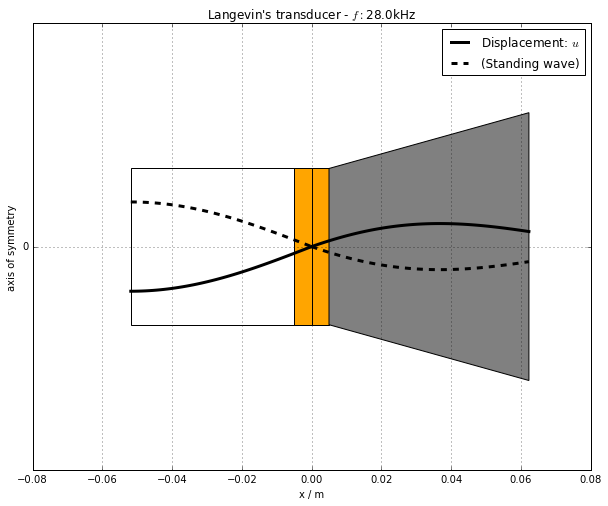

In [43]:
# Call the interactive slider
# working frequency between 28 and 40 kHz
interact(plot_response, freq=(28,40), emitter_diameter=(20,60))